In [1]:
import requests, csv
from bs4 import BeautifulSoup
import bs4
import unicodedata
from time import sleep
import pandas as pd
from selenium import webdriver
from selenium.webdriver.support.select import Select
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
import time 
import random
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import csv
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### 2) EDA and Feature Engineering

In [3]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [4]:
sw = stopwords.words('english')
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [5]:
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [6]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [7]:
def size(text):    
    if 'size' in text:
        size=1
    else:
        size=0
    return size

In [8]:
def pattern(text):
    if 'LED Flashlight 2P' in text:
        pattern=1
    else:
        pattern=0
    return pattern

In [9]:
df=pd.read_csv("/Users/richard/Desktop/Amazon_Reviews_Assignment_03.csv")

In [10]:
sid = SentimentIntensityAnalyzer()
spamreader =df['Reviews']
comments = []
list=[]
for i in spamreader:
    comments.append(i)
#print("Sentiment Analysis for " + filename + ":")
for comment in spamreader:
#         print(comment)
    ss = sid.polarity_scores(comment)
        #print(type(ss))
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
        list.append(ss)

compound: 0.4927, 
neg: 0.0, 
neu: 0.556, 
pos: 0.444, 
compound: 0.4927, 
neg: 0.0, 
neu: 0.715, 
pos: 0.285, 
compound: 0.8481, 
neg: 0.0, 
neu: 0.613, 
pos: 0.387, 
compound: 0.7905, 
neg: 0.0, 
neu: 0.222, 
pos: 0.778, 
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
compound: 0.7351, 
neg: 0.0, 
neu: 0.844, 
pos: 0.156, 
compound: 0.3071, 
neg: 0.059, 
neu: 0.858, 
pos: 0.082, 
compound: 0.8201, 
neg: 0.0, 
neu: 0.715, 
pos: 0.285, 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.9589, 
neg: 0.0, 
neu: 0.699, 
pos: 0.301, 
compound: -0.6966, 
neg: 0.145, 
neu: 0.855, 
pos: 0.0, 
compound: 0.9625, 
neg: 0.0, 
neu: 0.441, 
pos: 0.559, 
compound: -0.1697, 
neg: 0.121, 
neu: 0.773, 
pos: 0.105, 
compound: 0.7922, 
neg: 0.035, 
neu: 0.889, 
pos: 0.077, 
compound: 0.5719, 
neg: 0.0, 
neu: 0.351, 
pos: 0.649, 
compound: 0.7805, 
neg: 0.057, 
neu: 0.793, 
pos: 0.15, 
compound: 0.3612, 
neg: 0.0, 
neu: 0.706, 
pos: 0.294, 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0

pos: 0.151, 
compound: 0.7783, 
neg: 0.0, 
neu: 0.37, 
pos: 0.63, 
compound: 0.7337, 
neg: 0.064, 
neu: 0.723, 
pos: 0.213, 
compound: 0.0498, 
neg: 0.135, 
neu: 0.721, 
pos: 0.144, 
compound: 0.9077, 
neg: 0.0, 
neu: 0.764, 
pos: 0.236, 
compound: 0.5399, 
neg: 0.0, 
neu: 0.759, 
pos: 0.241, 
compound: 0.4754, 
neg: 0.0, 
neu: 0.694, 
pos: 0.306, 
compound: 0.7906, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
compound: 0.8746, 
neg: 0.0, 
neu: 0.584, 
pos: 0.416, 
compound: -0.0867, 
neg: 0.166, 
neu: 0.688, 
pos: 0.146, 
compound: 0.6696, 
neg: 0.0, 
neu: 0.267, 
pos: 0.733, 
compound: 0.2732, 
neg: 0.0, 
neu: 0.588, 
pos: 0.412, 
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
compound: 0.7096, 
neg: 0.0, 
neu: 0.404, 
pos: 0.596, 
compound: 0.7574, 
neg: 0.0, 
neu: 0.48, 
pos: 0.52, 
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
compound: 0.8615, 
neg: 0.0, 
neu: 0.239, 
pos: 0.761, 
compound: 0.9152, 
neg: 0.0, 
neu: 0.56, 
pos: 0.44, 
compound: 0.6249, 
neg: 0.0, 
neu:

pos: 0.0, 
compound: 0.8248, 
neg: 0.0, 
neu: 0.675, 
pos: 0.325, 
compound: 0.7184, 
neg: 0.054, 
neu: 0.718, 
pos: 0.228, 
compound: 0.8402, 
neg: 0.0, 
neu: 0.357, 
pos: 0.643, 
compound: -0.6369, 
neg: 0.426, 
neu: 0.574, 
pos: 0.0, 
compound: 0.6901, 
neg: 0.0, 
neu: 0.853, 
pos: 0.147, 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.3612, 
neg: 0.0, 
neu: 0.884, 
pos: 0.116, 
compound: -0.4767, 
neg: 0.383, 
neu: 0.617, 
pos: 0.0, 
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
compound: 0.6239, 
neg: 0.134, 
neu: 0.672, 
pos: 0.195, 
compound: 0.765, 
neg: 0.0, 
neu: 0.883, 
pos: 0.117, 
compound: 0.7412, 
neg: 0.0, 
neu: 0.793, 
pos: 0.207, 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.05, 
neg: 0.078, 
neu: 0.839, 
pos: 0.084, 
compound: 0.6588, 
neg: 0.0, 
neu: 0.406, 
pos: 0.594, 
compound: -0.7454, 
neg: 0.19, 
neu: 0.649, 
pos: 0.161, 
compound: -0.4404, 
neg: 0.153, 
neu: 0.847, 
pos: 0.0, 
compound: 0.4929, 
neg: 0.095, 
neu: 0.768,

neg: 0.418, 
neu: 0.324, 
pos: 0.258, 
compound: 0.9466, 
neg: 0.078, 
neu: 0.673, 
pos: 0.248, 
compound: 0.8969, 
neg: 0.0, 
neu: 0.628, 
pos: 0.372, 
compound: 0.7906, 
neg: 0.0, 
neu: 0.364, 
pos: 0.636, 
compound: 0.8173, 
neg: 0.0, 
neu: 0.761, 
pos: 0.239, 
compound: 0.8386, 
neg: 0.037, 
neu: 0.806, 
pos: 0.156, 
compound: 0.7475, 
neg: 0.019, 
neu: 0.904, 
pos: 0.078, 
compound: -0.1531, 
neg: 0.402, 
neu: 0.328, 
pos: 0.27, 
compound: 0.959, 
neg: 0.0, 
neu: 0.665, 
pos: 0.335, 
compound: 0.9201, 
neg: 0.0, 
neu: 0.816, 
pos: 0.184, 
compound: -0.0064, 
neg: 0.073, 
neu: 0.855, 
pos: 0.072, 
compound: 0.9061, 
neg: 0.089, 
neu: 0.626, 
pos: 0.285, 
compound: 0.9667, 
neg: 0.009, 
neu: 0.876, 
pos: 0.115, 
compound: 0.6249, 
neg: 0.0, 
neu: 0.328, 
pos: 0.672, 
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
compound: 0.855, 
neg: 0.0, 
neu: 0.193, 
pos: 0.807, 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.8438, 
neg: 0.047, 
neu: 0.706, 
pos: 0.247, 
c

In [11]:
j = 0
tmp = pd.DataFrame(list[0],index=[0])
for i in range(3,len(list)):
    if i%4 == 0:
        j += 1
        tmp = pd.concat([tmp,pd.DataFrame(list[i],index = [j])])

In [12]:
df_new=pd.concat([df,tmp],axis=1)
df_new.head()

,Author,Date,Pattern,Rating,Reviews,compound,neg,neu,pos
0,BW,"April 9, 2018",LED Flashlight 2P,5,"Durable, lightweight and very bright",0.4927,0.0,0.556,0.444
1,allena,"April 9, 2018",LED Flashlight 2P,5,Very good quality lights for the size of flash...,0.4927,0.0,0.715,0.285
2,Oscar A Campos,"April 9, 2018",LED Flashlight 2P,5,They work great. Flashlights are small but do ...,0.8481,0.0,0.613,0.387
3,Laura,"April 9, 2018",LED Flashlight 2P,5,Great little bright light!,0.7905,0.0,0.222,0.778
4,Emanuel,"April 9, 2018",LED Flashlight 2P,5,Great product..,0.6249,0.0,0.196,0.804


In [13]:
df_new['Reviews']=df_new['Reviews'].apply(remove_punctuation)
df_new['Reviews']=df_new['Reviews'].apply(stopwords)
df_new['Reviews']=df_new['Reviews'].apply(stemming)
df_new['Length']=df_new['Reviews'].apply(length)
df_new['Size']=df_new['Reviews'].apply(size)

In [14]:
df_new['Pattern_Categorical']=df_new['Pattern'].apply(pattern)

In [15]:
df_newest=df_new

In [16]:
df_newest

,Author,Date,Pattern,Rating,Reviews,compound,neg,neu,pos,Length,Size,Pattern_Categorical
0,BW,"April 9, 2018",LED Flashlight 2P,5,durabl lightweight bright,0.4927,0.000,0.556,0.444,25,0,1
1,allena,"April 9, 2018",LED Flashlight 2P,5,good qualiti light size flashlight,0.4927,0.000,0.715,0.285,34,1,1
2,Oscar A Campos,"April 9, 2018",LED Flashlight 2P,5,work great flashlight small great job light area,0.8481,0.000,0.613,0.387,48,0,1
3,Laura,"April 9, 2018",LED Flashlight 2P,5,great littl bright light,0.7905,0.000,0.222,0.778,24,0,1
4,Emanuel,"April 9, 2018",LED Flashlight 2P,5,great product,0.6249,0.000,0.196,0.804,13,0,1
5,LL,"April 9, 2018",LED Flashlight 2P,5,compact size flashlight fit palm 3 light level...,0.7351,0.000,0.844,0.156,133,1,1
6,Jennifer,"April 9, 2018",LED Flashlight 2P,2,small awesom bought light stop turn flashlight...,0.3071,0.059,0.858,0.082,120,0,1
7,markfp,"April 9, 2018",LED Flashlight 2P,4,arriv quick seem good product admit smaller ex...,0.8201,0.000,0.715,0.285,89,1,1
8,Curious John,"April 9, 2018",LED Flashlight 2P,5,lite light last longer liber,0.0000,0.000,1.000,0.000,28,0,1
9,HMSSMS,"April 9, 2018",4 pack,5,arriv fast perfect condit use 2 motorhom camp ...,0.9589,0.000,0.699,0.301,166,1,0


#### All the features are not normal distribution and we need do the log transformation or sqrt transformation to the numericial data

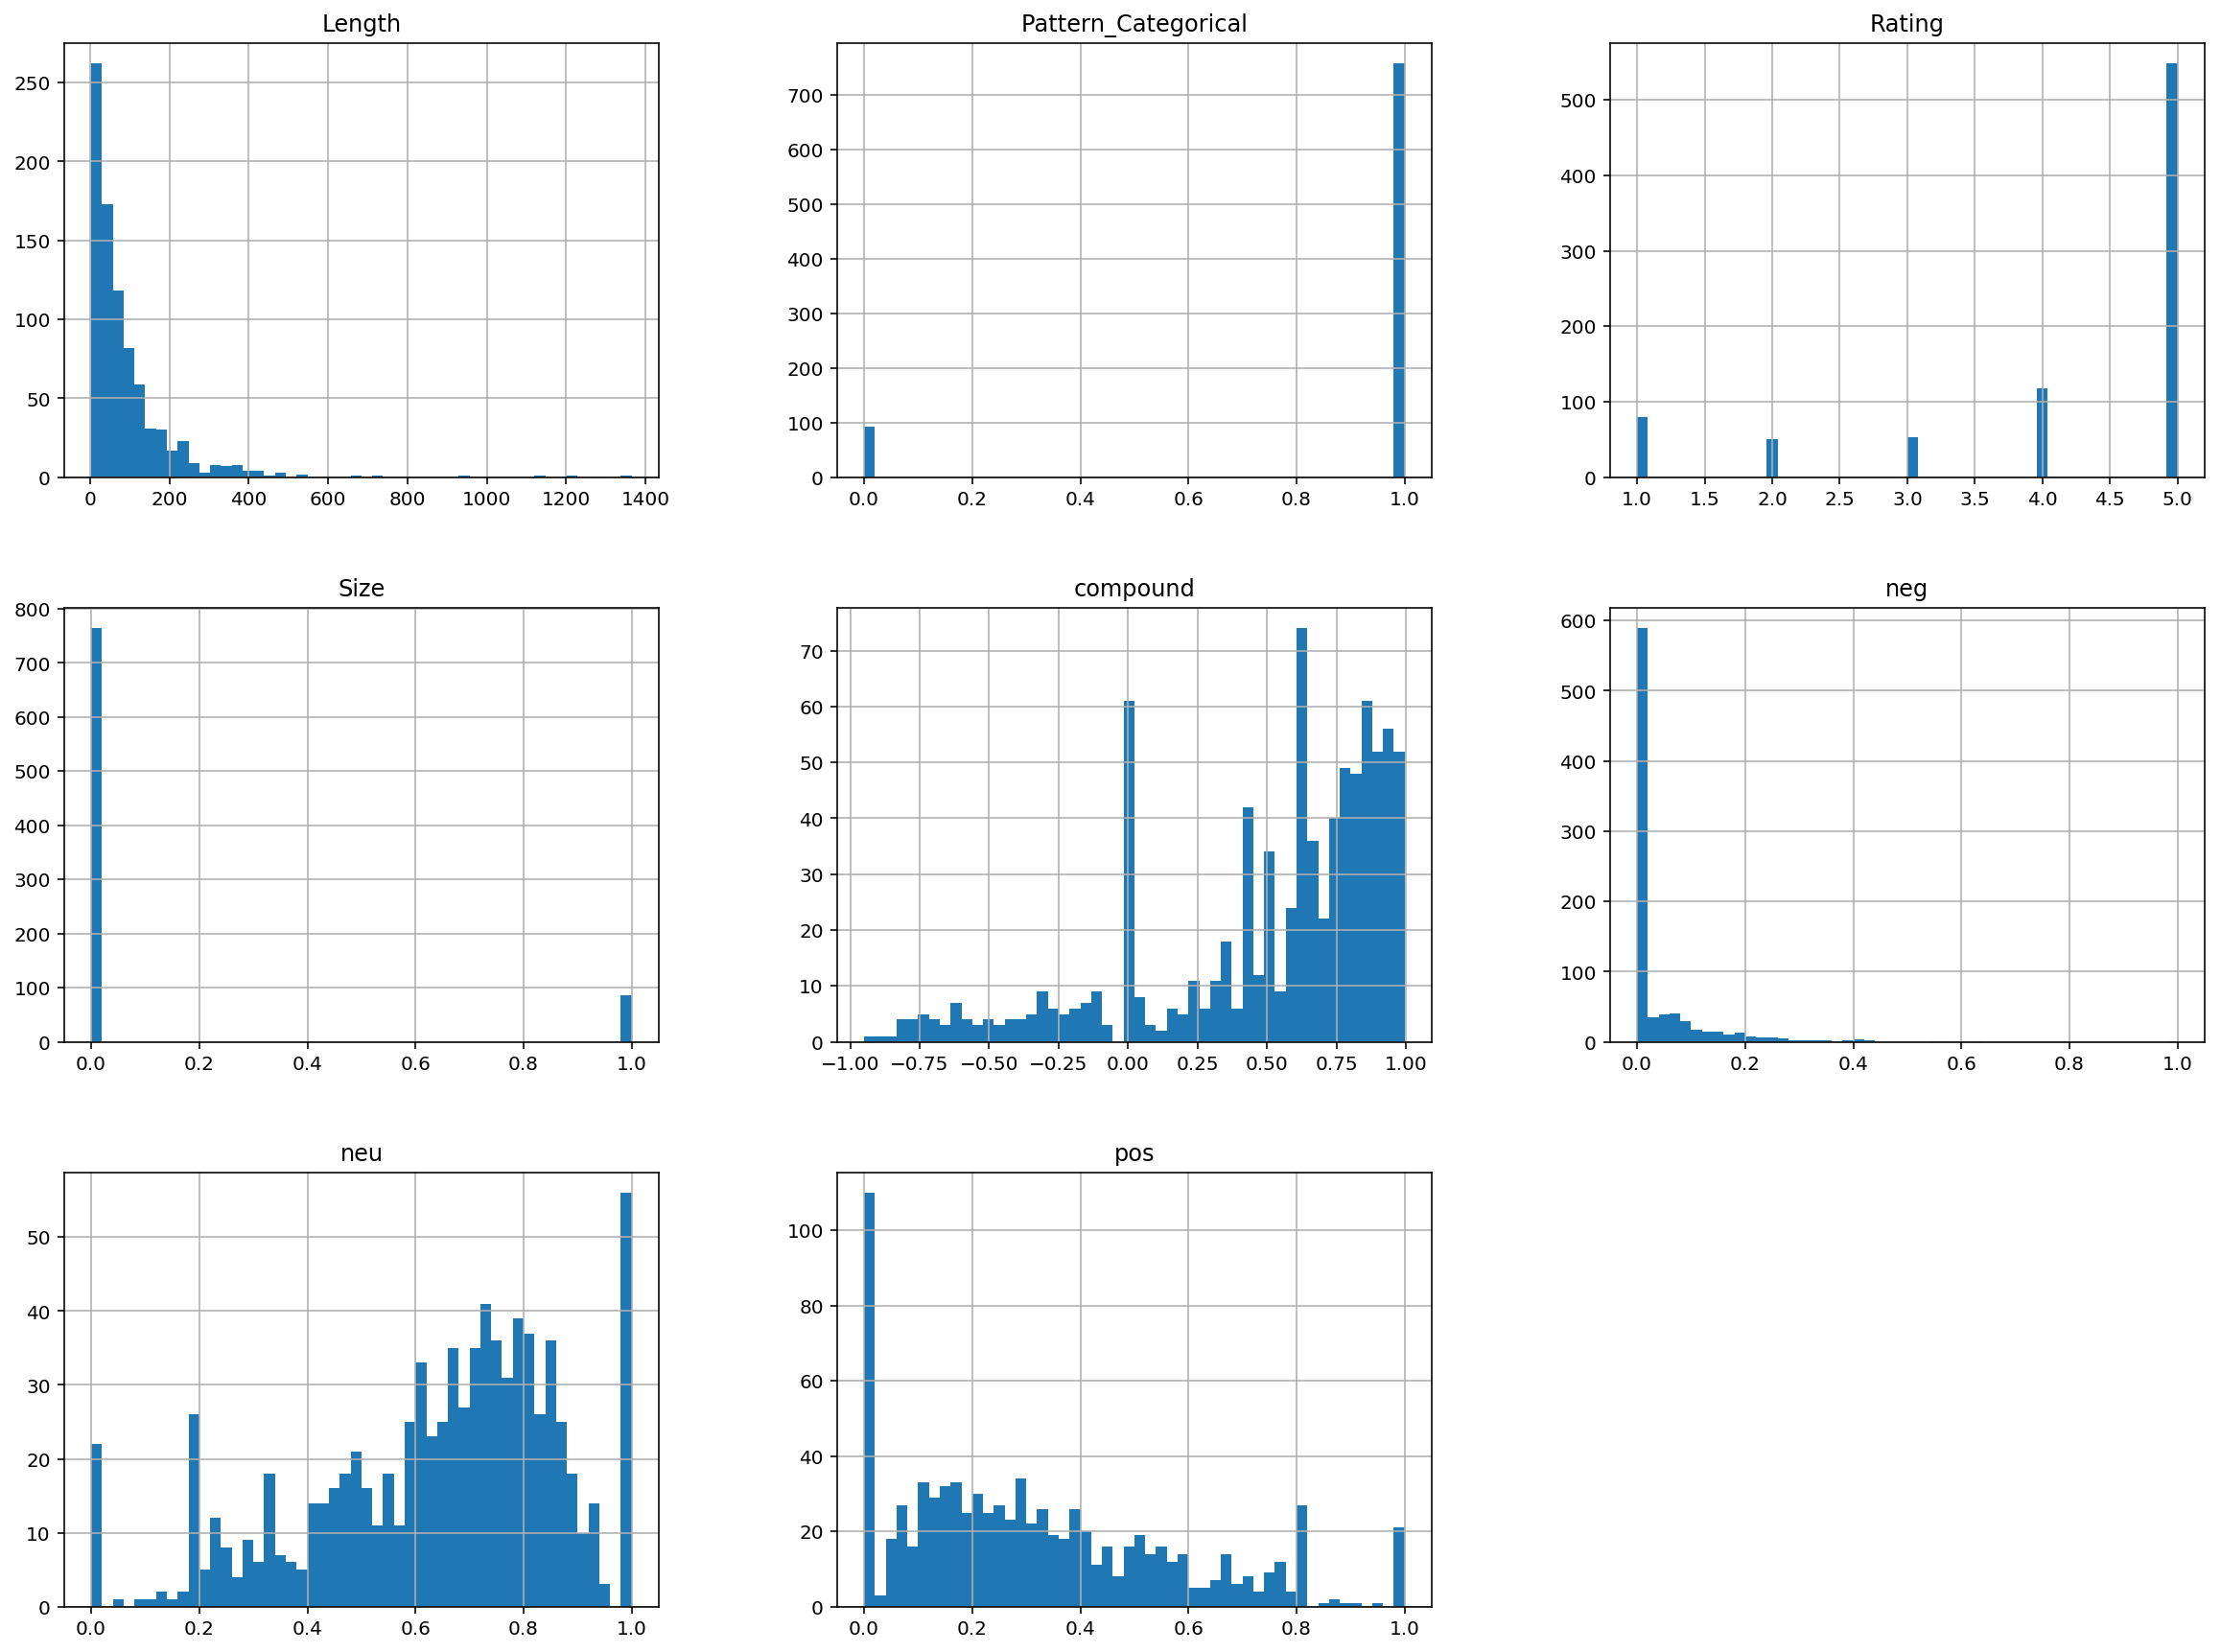

In [17]:
df_newest.hist(bins=50, figsize=(20,15))
plt.show()

### The 'Length' feature is most unrelated to the 'rating', we could eliminate this feature later

In [18]:
import seaborn as sns

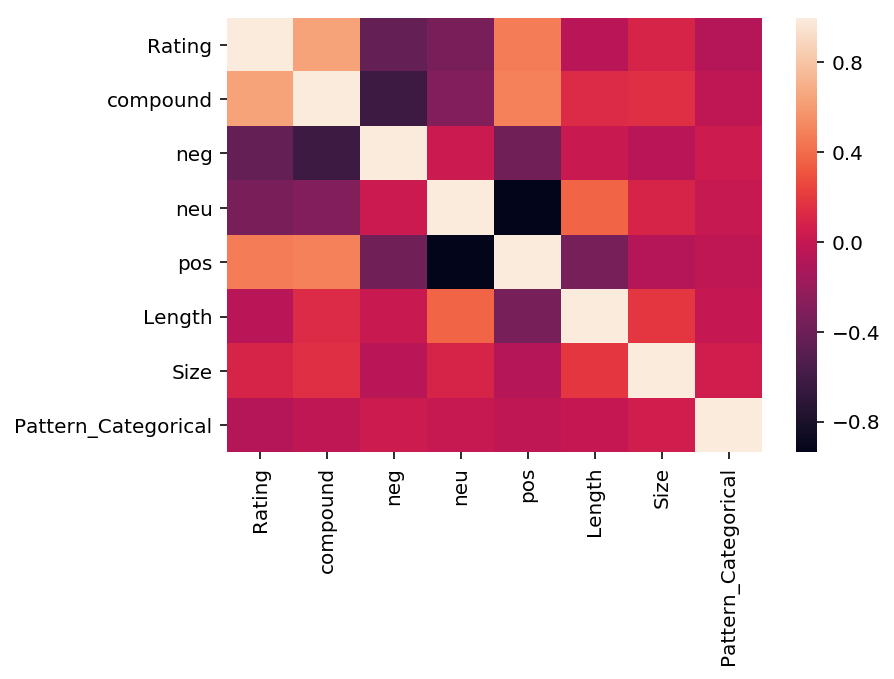

In [19]:
corr = df_newest.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [20]:
corr

,Rating,compound,neg,neu,pos,Length,Size,Pattern_Categorical
Rating,1.000000,0.642903,-0.438053,-0.345931,0.473350,-0.053608,0.098524,-0.075434
compound,0.642903,1.000000,-0.625038,-0.294748,0.490900,0.132312,0.155750,-0.024115
neg,-0.438053,-0.625038,1.000000,0.028449,-0.374259,0.018932,-0.054184,0.033458
neu,-0.345931,-0.294748,0.028449,1.000000,-0.937596,0.371158,0.093667,0.014662
pos,0.473350,0.490900,-0.374259,-0.937596,1.000000,-0.350792,-0.067958,-0.025241
Length,-0.053608,0.132312,0.018932,0.371158,-0.350792,1.000000,0.189539,0.001834
Size,0.098524,0.155750,-0.054184,0.093667,-0.067958,0.189539,1.000000,0.054100
Pattern_Categorical,-0.075434,-0.024115,0.033458,0.014662,-0.025241,0.001834,0.054100,1.000000


In [21]:
cov = df_newest.cov()

In [22]:
cov

,Rating,compound,neg,neu,pos,Length,Size,Pattern_Categorical
Rating,1.763793,0.377792,-0.051585,-0.108641,0.160235,-8.490271,0.039482,-0.031143
compound,0.377792,0.195780,-0.024523,-0.030840,0.055364,6.981497,0.020794,-0.003317
neg,-0.051585,-0.024523,0.007862,0.000597,-0.008459,0.200182,-0.001450,0.000922
neu,-0.108641,-0.030840,0.000597,0.055919,-0.056513,10.466592,0.006683,0.001078
pos,0.160235,0.055364,-0.008459,-0.056513,0.064968,-10.662647,-0.005227,-0.002000
Length,-8.490271,6.981497,0.200182,10.466592,-10.662647,14221.019436,6.820206,0.067978
Size,0.039482,0.020794,-0.001450,0.006683,-0.005227,6.820206,0.091047,0.005074
Pattern_Categorical,-0.031143,-0.003317,0.000922,0.001078,-0.002000,0.067978,0.005074,0.096634


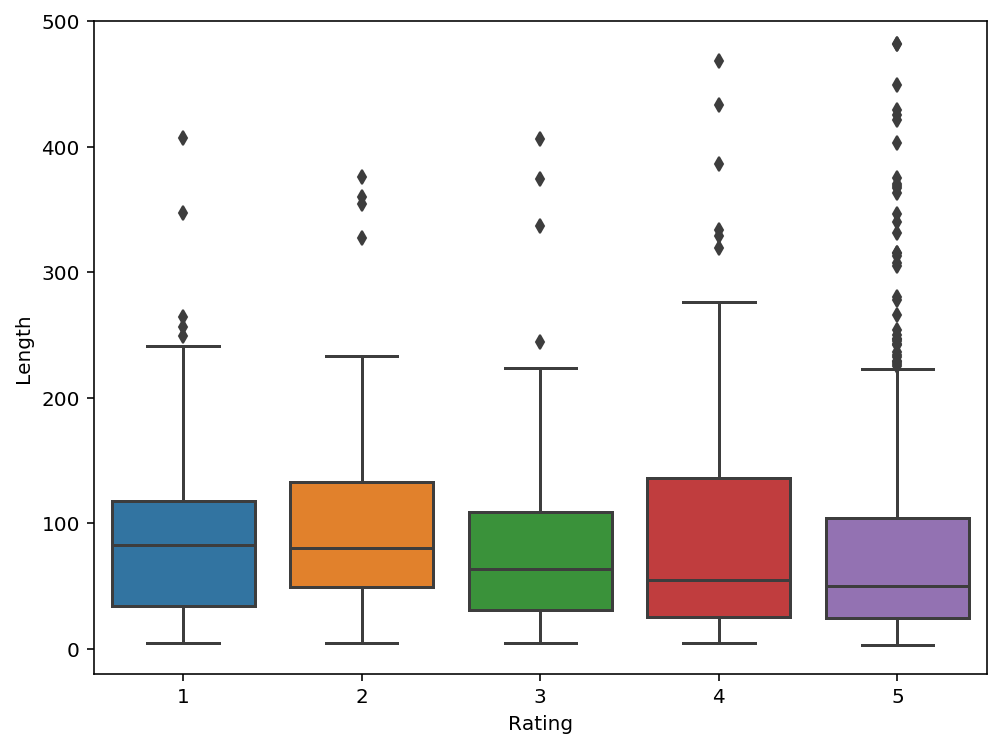

In [23]:
var = 'Rating'
data = pd.concat([df_newest['Length'], df_newest[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Length", data=data)
fig.axis(ymin=-20, ymax=500);

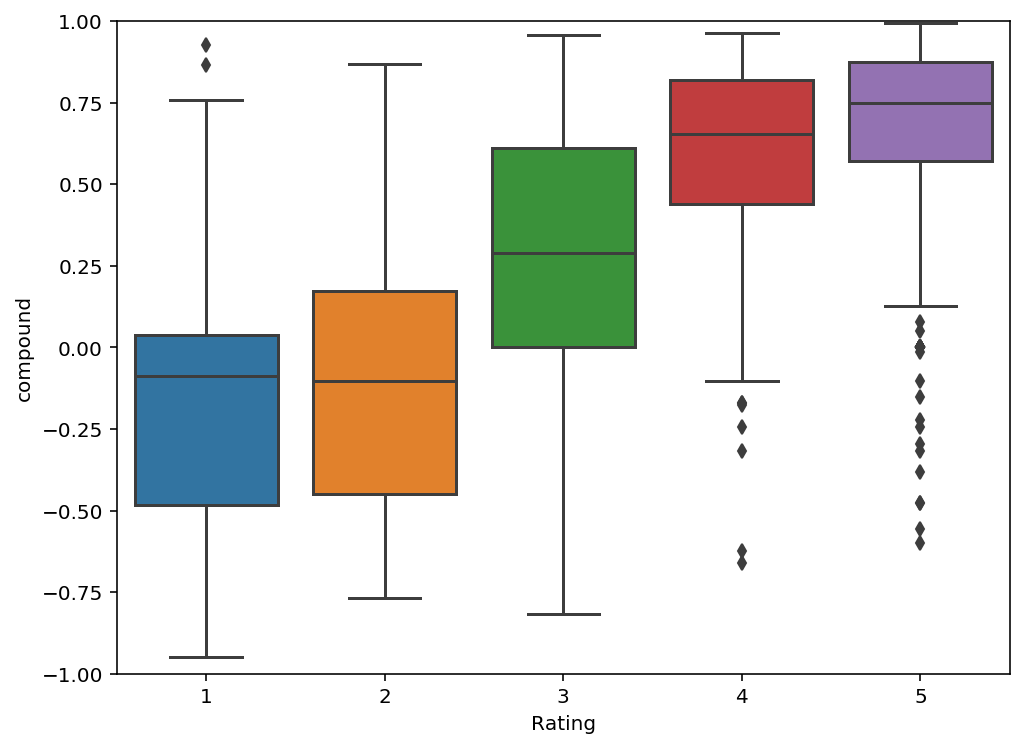

In [24]:
var = 'Rating'
data = pd.concat([df_newest['compound'], df_newest[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="compound", data=data)
fig.axis(ymin=-1, ymax=1);

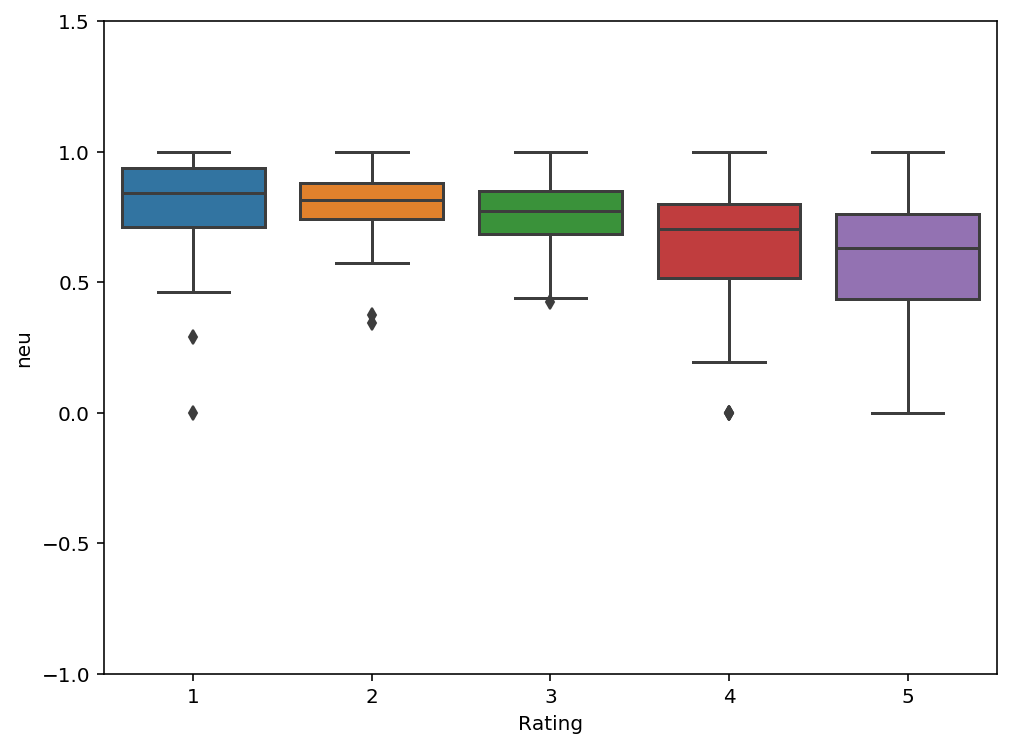

In [25]:
var = 'Rating'
data = pd.concat([df_newest['neu'], df_newest[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="neu", data=data)
fig.axis(ymin=-1, ymax=1.5);

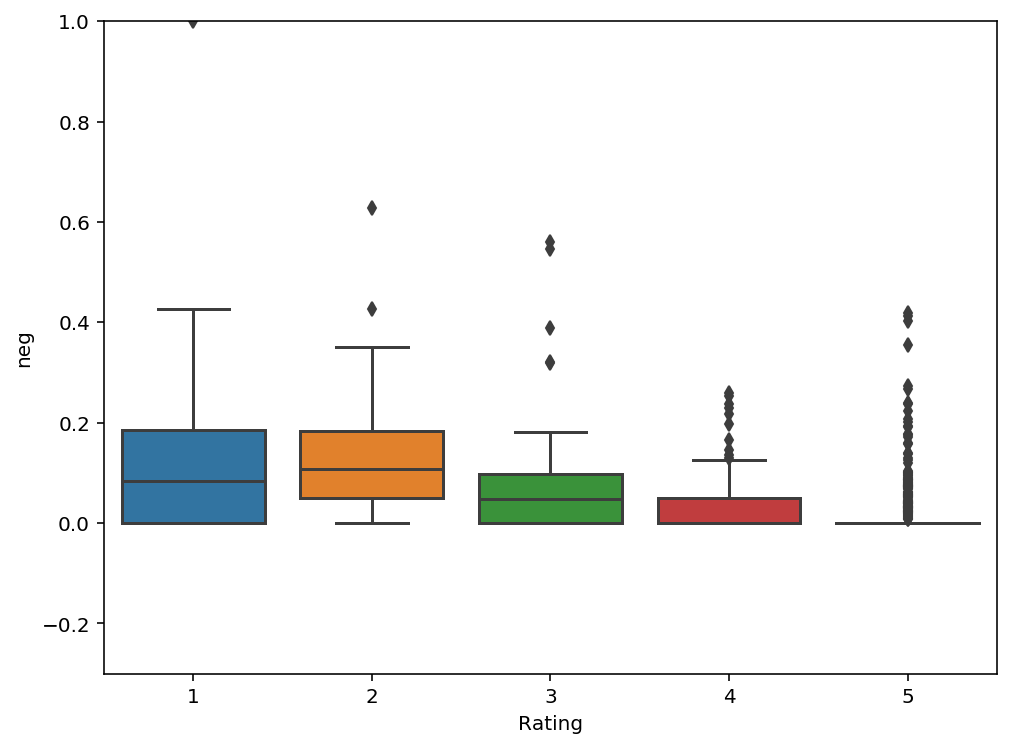

In [26]:
var = 'Rating'
data = pd.concat([df_newest['neg'], df_newest[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="neg", data=data)
fig.axis(ymin=-0.3, ymax=1);

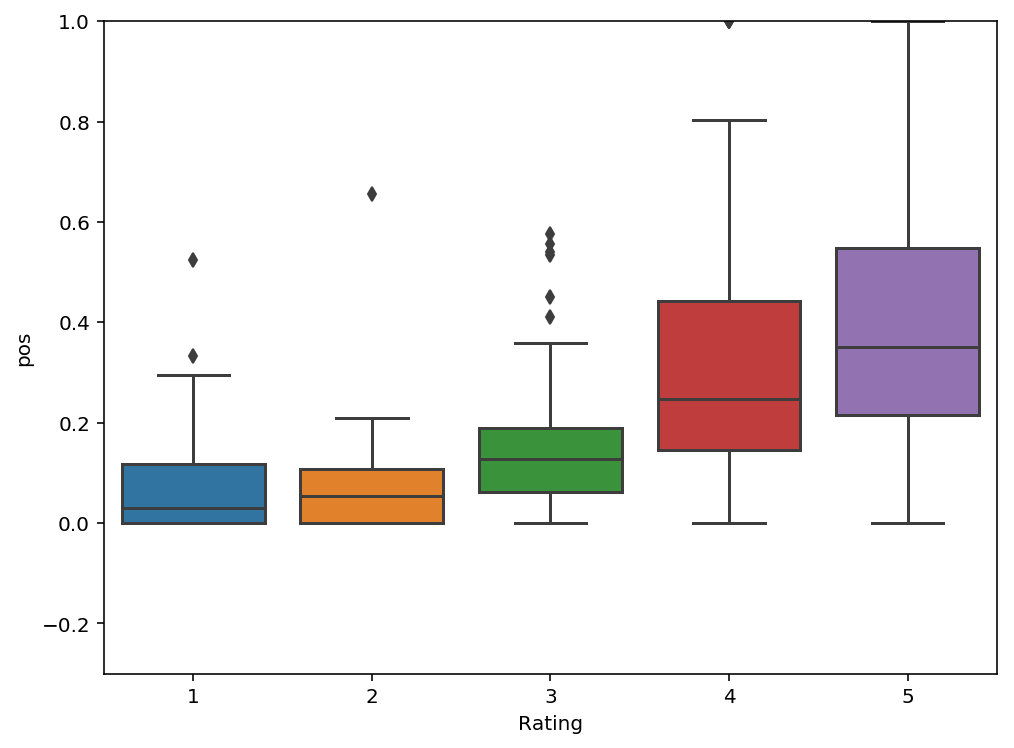

In [27]:
var = 'Rating'
data = pd.concat([df_newest['pos'], df_newest[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="pos", data=data)
fig.axis(ymin=-0.3, ymax=1);

### 3) 4) Build machine learning model, tunning the hyperparameters and compare models

In [28]:
y=df_newest['Rating']
df_update=df_newest.drop(['Rating','Date','Pattern','Author'],axis=1,inplace=True)

In [29]:
df_newest.shape

(850, 8)

In [59]:
cv = CountVectorizer(max_features=500)
data = cv.fit_transform(df_newest.Reviews)

In [60]:
DF1=pd.concat([pd.DataFrame(data.toarray()), df_newest], axis=1)

In [61]:
DF1.drop(['Reviews'],axis=1,inplace=True)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [63]:
from sklearn.model_selection import cross_val_score

In [95]:
np.random.seed(4)
C = [0.05,0.1,0.5,1,1.5,2]
gamma = [0.005,0.01, 0.05, 0.1, 0.5]
svc_lin = svm.SVC(kernel="rbf")
svc_rbf = svm.SVC(kernel="linear")
svc_lin_cv = GridSearchCV(svc_lin, param_grid={"C":C})
svc_rbf_cv = GridSearchCV(svc_rbf, param_grid={"C":C, "gamma":gamma})
svc_lin_cv.fit(DF1, y)
svc_rbf_cv.fit(DF1, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.05, 0.1, 0.5, 1, 1.5, 2], 'gamma': [0.005, 0.01, 0.05, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [96]:
svc_rbf_cv.best_params_

{'C': 0.05, 'gamma': 0.005}

In [97]:
svc_lin_cv.best_params_

{'C': 0.05}

In [98]:
svc_lin=svm.SVC(kernel="linear", C= 0.05)
cross_val_score(svc_lin, X=DF1, y=y, cv=10, scoring='accuracy').mean()

0.70129610379818241

In [99]:
svc_rbf=svm.SVC(kernel="rbf", C= 0.05, gamma=0.005)
cross_val_score(svc_rbf, X=DF1, y=y, cv=10, scoring='accuracy').mean()

0.64477526124120055

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_grid = {'C': np.linspace(1, 100, 1), 'penalty': ['l1', 'l2']}
grid_lr = GridSearchCV(lr, param_grid=param_grid, cv=10, n_jobs=1)

In [82]:
grid_lr.fit(DF1,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([ 1.]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
grid_lr.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [86]:
lr=grid_lr.best_estimator_
# lr=LogisticRegression(C=1, penalty='l1')
cross_val_score(lr, X=DF1, y=y, cv=10, scoring='accuracy').mean()

0.71424379720874154

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
from sklearn.ensemble import RandomForestClassifier
sample_leaf_options = [1,5,10,50,100,200,500]
for leaf_size in sample_leaf_options:
    model = RandomForestClassifier(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = leaf_size)
    model.fit(DF1,y)
    print(cross_val_score(model, X=DF1, y=y, cv=10, scoring='accuracy').mean())

0.69432034852
0.656446140238
0.644775261241
0.644775261241
0.644775261241
0.644775261241
0.644775261241


In [47]:
from sklearn.neighbors import KNeighborsClassifier 
k_range = range(15,30)
KNN_result = []
for i in k_range:
    kNN= KNeighborsClassifier(n_neighbors=i)
    kNN.fit(DF1,y) 
    p_2=cross_val_score(kNN, X=DF1, y=y, cv=10, scoring='accuracy').mean()
    KNN_result.append(p_2)

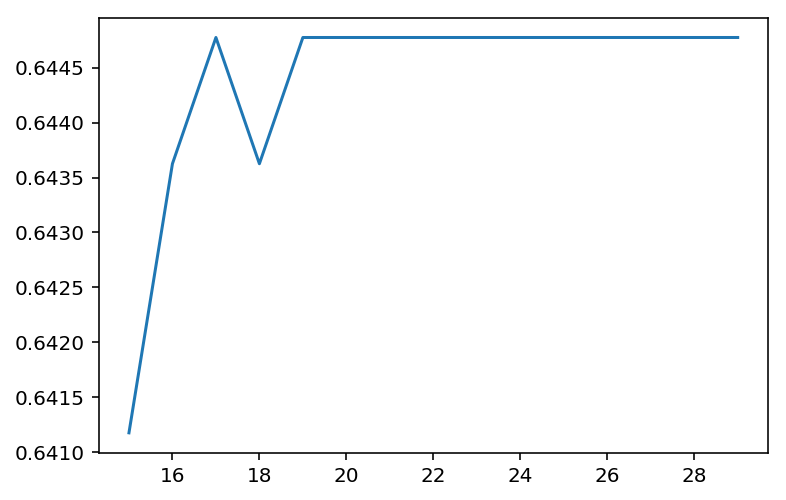

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, KNN_result)

In [49]:
kNN= KNeighborsClassifier(n_neighbors=19)
cross_val_score(kNN, X=DF1, y=y, cv=10, scoring='accuracy').mean()

0.64477526124120055

In [88]:
DF1

,0,1,2,3,4,5,6,7,8,9,...,996,997,998,999,compound,neg,neu,pos,Size,Pattern_Categorical
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.4927,0.000,0.556,0.444,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.4927,0.000,0.715,0.285,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8481,0.000,0.613,0.387,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.7905,0.000,0.222,0.778,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.6249,0.000,0.196,0.804,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.7351,0.000,0.844,0.156,1,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.3071,0.059,0.858,0.082,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8201,0.000,0.715,0.285,1,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0000,0.000,1.000,0.000,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.9589,0.000,0.699,0.301,1,0


### After tunning the parameters in different models, I found that the Logistic Regression model could achieve the highest accuracy score: 71.42% with parameters ('C': 1.0, 'penalty': 'l1')